<a href="https://colab.research.google.com/github/Francis-Subasinghe/TrendCast/blob/main/MScProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [2]:
import pycaret
from sklearn.linear_model import Ridge
import joblib

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('/content/data.csv')
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholders Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [6]:
# Print the columns in your DataFrame to identify potential mismatches.
df.columns = df.columns.str.strip()
print(df.columns)

features_to_retain = [
    'ROA(C) before interest and depreciation before interest',
    'Operating Gross Margin',
    'Operating Profit Rate',
    'Pre-tax net Interest Rate',
    'Operating Expense Rate',
    'Research and development expense rate',
    'Cash flow rate',
    'Interest-bearing debt interest rate',
    'Net Value Per Share (B)',
    'Current Ratio',
    'Net Income to Stockholders Equity'
]

# Now try creating your new DataFrame
featuresDF = df[features_to_retain]

Index(['Bankrupt?', 'ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'Operating Gross Margin', 'Realized Sales Gross Margin',
       'Operating Profit Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Tax rate (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)',
       'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net profit before tax (Yuan ¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-tax

In [7]:
featuresDF.shape

(6819, 11)

In [8]:
featuresDF.dtypes

,0
ROA(C) before interest and depreciation before interest,float64
Operating Gross Margin,float64
Operating Profit Rate,float64
Pre-tax net Interest Rate,float64
Operating Expense Rate,float64
Research and development expense rate,float64
Cash flow rate,float64
Interest-bearing debt interest rate,float64
Net Value Per Share (B),float64
Current Ratio,float64


In [9]:
featuresDF.describe()

,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Net Value Per Share (B),Current Ratio,Net Income to Stockholders Equity
count,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000
mean,0.505180,0.607948,0.998755,0.797190,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.190661,4.032850e+05,0.840402
std,0.060686,0.016934,0.013010,0.012869,3.237684e+09,2.598292e+09,0.017036,1.082750e+08,0.033390,3.330216e+07,0.014523
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.476527,0.600445,0.998969,0.797386,1.566870e-04,1.281880e-04,0.461558,2.030200e-04,0.173613,7.555047e-03,0.840115
50%,0.502706,0.605997,0.999022,0.797464,2.777590e-04,5.090000e+08,0.465080,3.210320e-04,0.184400,1.058717e-02,0.841179
75%,0.535563,0.613914,0.999095,0.797579,4.145000e+09,3.450000e+09,0.471004,5.325530e-04,0.199570,1.626953e-02,0.842357
max,1.000000,1.000000,1.000000,1.000000,9.990000e+09,9.980000e+09,1.000000,9.900000e+08,1.000000,2.750000e+09,1.000000


In [10]:
print(featuresDF.columns)

Index(['ROA(C) before interest and depreciation before interest',
       'Operating Gross Margin', 'Operating Profit Rate',
       'Pre-tax net Interest Rate', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Net Value Per Share (B)',
       'Current Ratio', 'Net Income to Stockholders Equity'],
      dtype='object')


In [11]:
featuresDF.isnull().sum()

,0
ROA(C) before interest and depreciation before interest,0
Operating Gross Margin,0
Operating Profit Rate,0
Pre-tax net Interest Rate,0
Operating Expense Rate,0
Research and development expense rate,0
Cash flow rate,0
Interest-bearing debt interest rate,0
Net Value Per Share (B),0
Current Ratio,0


In [12]:
from pycaret.regression import setup, compare_models, tune_model

# Initialize PyCaret setup, disabling stratification
#clf1 = setup(data=featuresDF, target='Net Income to Stockholders Equity', data_split_stratify=False)

# Train and compare all models, selecting the best one based on R2 score
#best_model = compare_models(sort='R2')



# Initialize PyCaret setup, disabling stratification
clf1 = setup(
    data=featuresDF,
    target='Net Income to Stockholders Equity',
    data_split_stratify=False
)

# Train and compare all models, selecting the best one based on R2 score, excluding the dummy regressor
best_model = compare_models(sort='R2', exclude=['dummy'])



,Description,Value
0,Session id,2139
1,Target,Net Income to Stockholders Equity
2,Target type,Regression
3,Original data shape,"(6819, 11)"
4,Transformed data shape,"(6819, 11)"
5,Transformed train set shape,"(4773, 11)"
6,Transformed test set shape,"(2046, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,0.0010,0.0001,0.0054,0.5855,0.0032,0.0014,0.1840
et,Extra Trees Regressor,0.0011,0.0001,0.0058,0.4639,0.0034,0.0015,1.6100
lightgbm,Light Gradient Boosting Machine,0.0012,0.0001,0.0058,0.4618,0.0034,0.0016,1.5810
gbr,Gradient Boosting Regressor,0.0011,0.0001,0.0062,0.2518,0.0036,0.0015,1.4980
rf,Random Forest Regressor,0.0011,0.0001,0.0065,0.1639,0.0038,0.0015,4.7460
lr,Linear Regression,0.0025,0.0001,0.0077,0.0043,0.0044,0.0032,0.9530
lasso,Lasso Regression,0.0025,0.0001,0.0077,0.0043,0.0044,0.0032,0.1050
en,Elastic Net,0.0025,0.0001,0.0077,0.0043,0.0044,0.0032,0.0580
llar,Lasso Least Angle Regression,0.0025,0.0001,0.0077,0.0043,0.0044,0.0032,0.0440
omp,Orthogonal Matching Pursuit,0.0025,0.0001,0.0077,0.0022,0.0044,0.0032,0.0410


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [13]:
# print best_model parameters
print(best_model)



XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=2139, ...)


In [14]:
# tune the best model
tuned_best_model = tune_model(best_model)
print(tuned_best_model)

#if str(best_model) == 'DummyRegressor()':
 #   print("Warning: DummyRegressor is the best model. Consider feature engineering or trying different algorithms.")
  #  tuned_lr_model = tune_model(lr)
    # You might want to perform additional analysis or feature engineering here.

    # Optionally, you can still tune a different model (e.g., 'lr' if it exists in your comparison)
    # tuned_lr_model = tune_model(lr)
#else:
    # Tune the best model
 #   tuned_best_model = tune_model(best_model)
 #   print(tuned_best_model)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0007,0.0000,0.0021,0.8683,0.0011,0.0009
1,0.0008,0.0000,0.0028,0.7264,0.0015,0.0010
2,0.0027,0.0006,0.0242,0.1689,0.0150,0.0049
3,0.0006,0.0000,0.0012,0.8377,0.0007,0.0008
4,0.0011,0.0000,0.0048,0.1929,0.0026,0.0013
5,0.0009,0.0000,0.0029,0.8681,0.0016,0.0011
6,0.0007,0.0000,0.0019,0.8049,0.0011,0.0009
7,0.0012,0.0001,0.0079,0.4494,0.0046,0.0016
8,0.0007,0.0000,0.0014,0.8879,0.0008,0.0008


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=210, n_jobs=-1,
             num_parallel_tree=None, random_state=2139, ...)


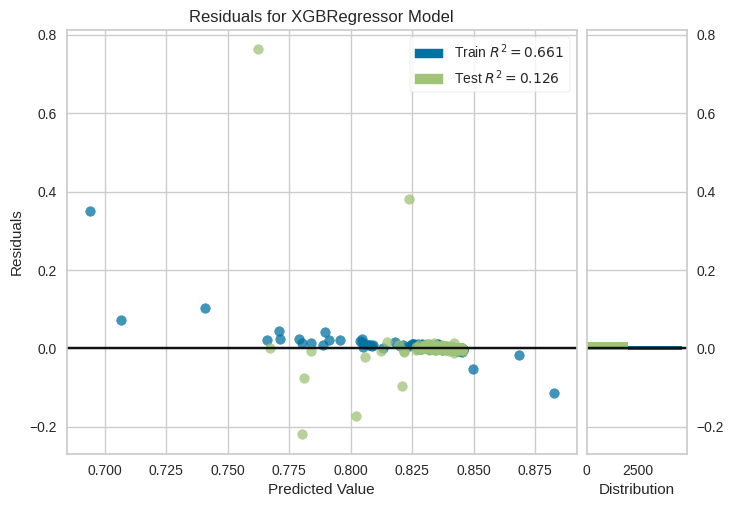

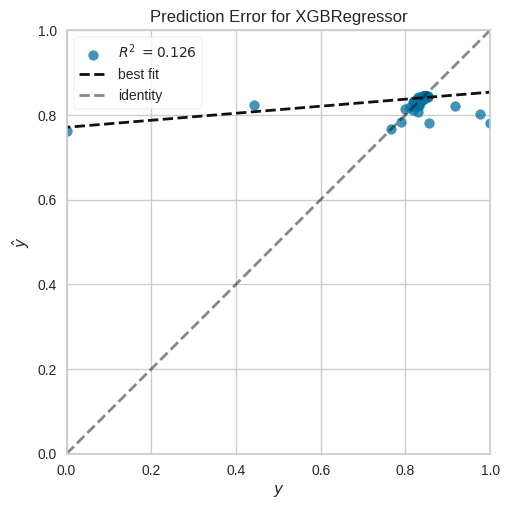

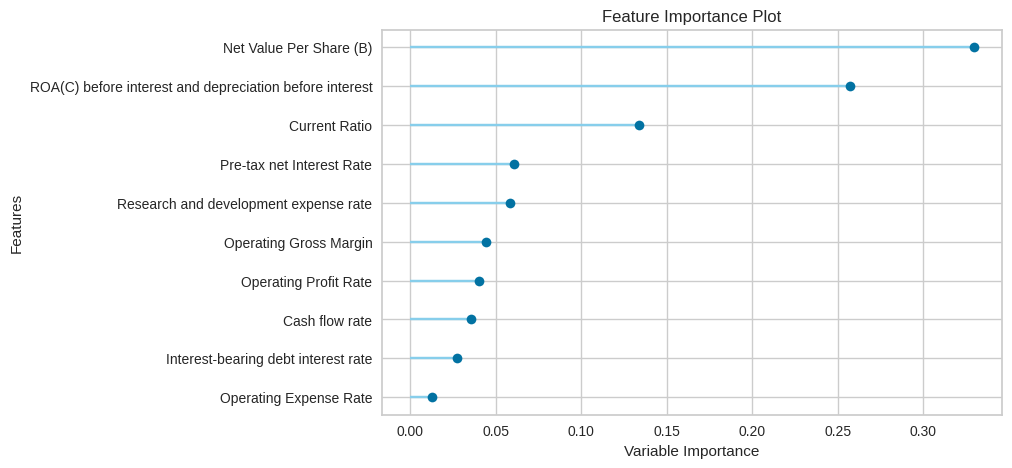

In [15]:
from pycaret.regression import plot_model

# Plot residuals
plot_model(tuned_best_model, plot = 'residuals')

# Plot predicted vs actual values
plot_model(tuned_best_model, plot = 'error')

# Plot feature importance
plot_model(tuned_best_model, plot = 'feature')

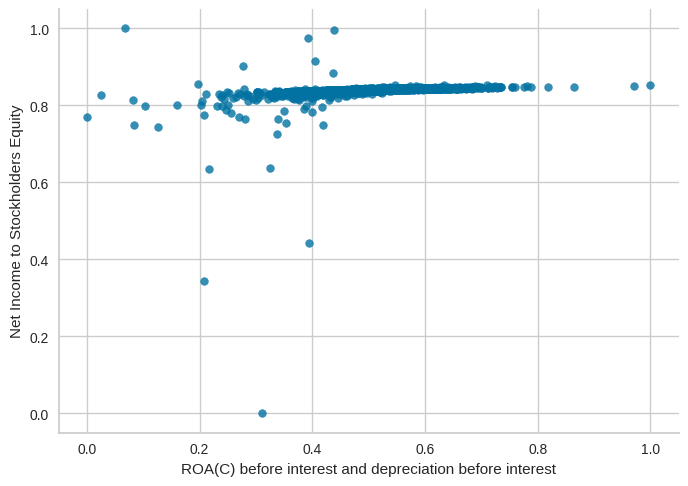

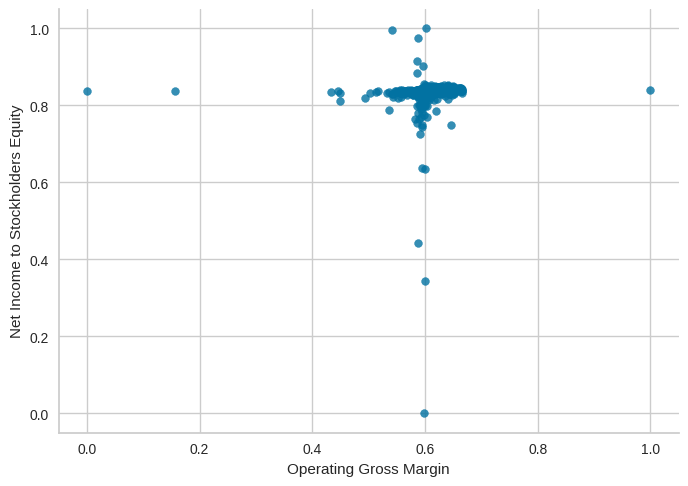

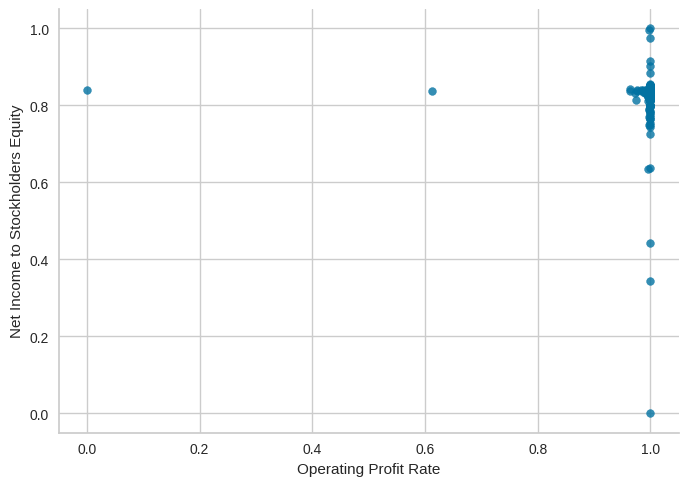

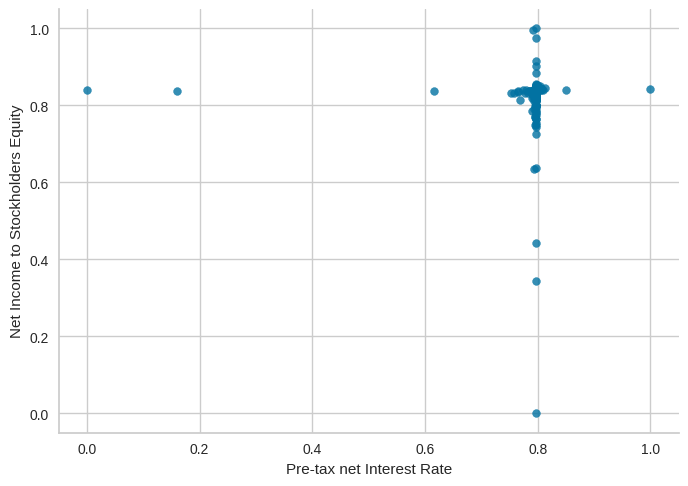

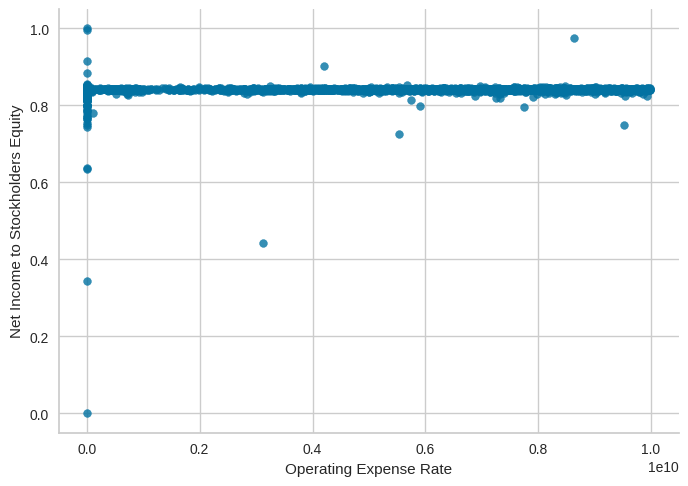

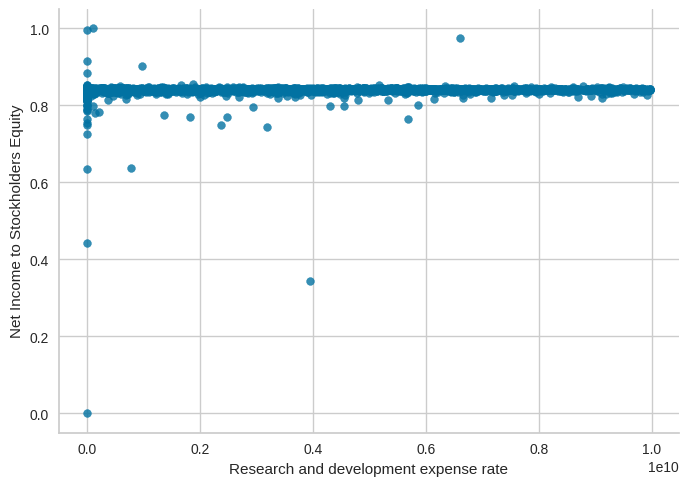

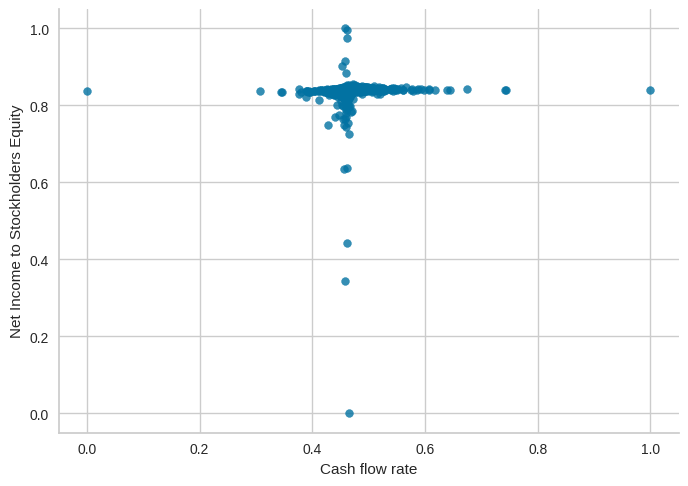

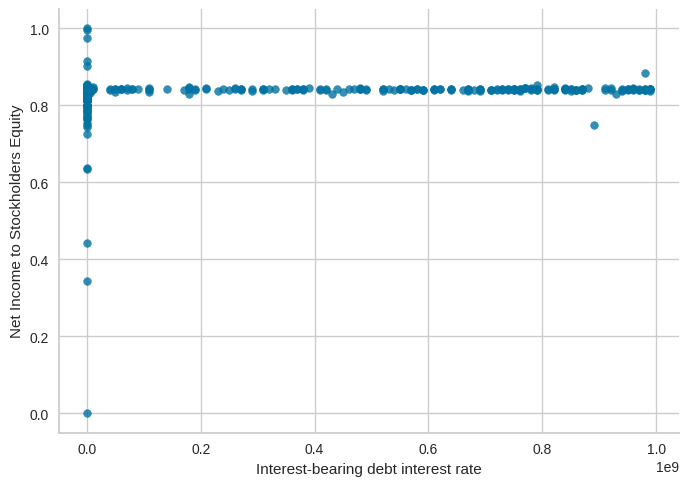

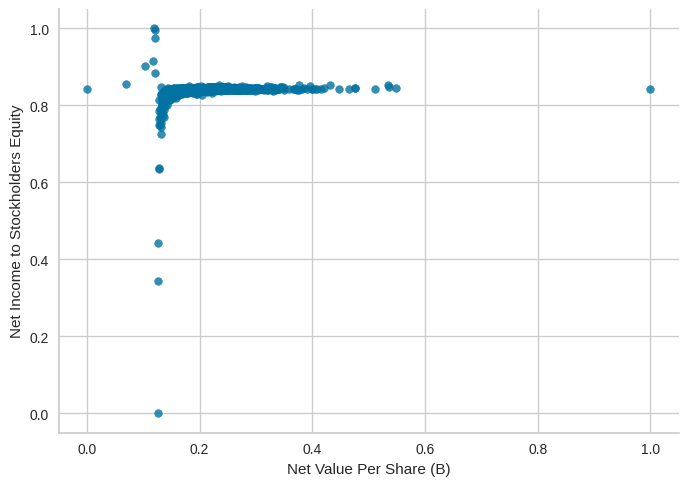

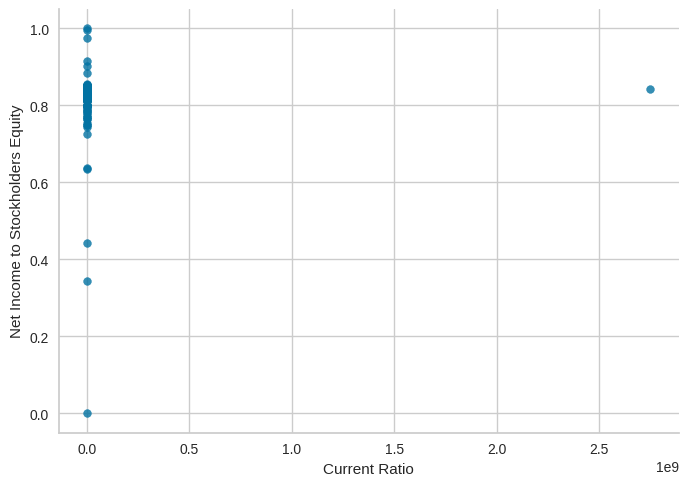

In [16]:
df.plot(kind='scatter', x='ROA(C) before interest and depreciation before interest', y='Net Income to Stockholders Equity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.plot(kind='scatter', x='Operating Gross Margin', y='Net Income to Stockholders Equity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.plot(kind='scatter', x='Operating Profit Rate', y='Net Income to Stockholders Equity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.plot(kind='scatter', x='Pre-tax net Interest Rate', y='Net Income to Stockholders Equity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.plot(kind='scatter', x='Operating Expense Rate', y='Net Income to Stockholders Equity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.plot(kind='scatter', x='Research and development expense rate', y='Net Income to Stockholders Equity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.plot(kind='scatter', x='Cash flow rate', y='Net Income to Stockholders Equity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.plot(kind='scatter', x='Interest-bearing debt interest rate', y='Net Income to Stockholders Equity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.plot(kind='scatter', x='Net Value Per Share (B)', y='Net Income to Stockholders Equity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.plot(kind='scatter', x='Current Ratio', y='Net Income to Stockholders Equity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


In [17]:
# Feature Selection
# We will select only those features which have association i.e., which majorly impacts our target variable
x = df[['ROA(C) before interest and depreciation before interest',
       'Operating Gross Margin', 'Operating Profit Rate',
       'Pre-tax net Interest Rate', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Net Value Per Share (B)',
       'Current Ratio']]

#target variable
y = df["Net Income to Stockholders Equity"]

x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [18]:
# Splitting into training set and testing set
# test_size=0.2 means the train set will be 80% and test set will be 20%
# random_state means that whenever we split the data it will split in same way as we have specified a number to it, the number can be anything
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
# Model Fitting
# We have selected Linear regression Model

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [20]:
print(xtest)

[[4.34456199e-01 5.96325978e-01 9.98790914e-01 ... 0.00000000e+00
  1.74076103e-01 1.67387930e-02]
 [5.42534003e-01 6.03417461e-01 9.99040842e-01 ... 2.64026000e-04
  1.89077578e-01 9.77656900e-03]
 [5.84897382e-01 6.10566598e-01 9.99079204e-01 ... 0.00000000e+00
  1.86928490e-01 1.37703160e-02]
 ...
 [4.87788232e-01 6.06703758e-01 9.98974865e-01 ... 2.90029000e-04
  1.82040369e-01 6.79810700e-03]
 [4.49081071e-01 5.98906009e-01 9.98888667e-01 ... 4.92049000e-04
  2.00960769e-01 8.32134700e-03]
 [5.51796422e-01 6.33397714e-01 9.99041189e-01 ... 2.90000000e+08
  2.00876491e-01 7.72290900e-03]]


In [21]:
# Change featuresDF.DataFrame to pd.DataFrame
data = pd.DataFrame(data={"Predicted Profit": ypred.flatten()})
print(data.head())

   Predicted Profit
0          0.835028
1          0.843041
2          0.845392
3          0.835386
4          0.840536


In [22]:
# Predicting on Sample data from dataset
d1=df.sample(10)
d1=d1[['ROA(C) before interest and depreciation before interest',
       'Operating Gross Margin', 'Operating Profit Rate',
       'Pre-tax net Interest Rate', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Net Value Per Share (B)',
       'Current Ratio']]
d1=d1.to_numpy()
ypred1=model.predict(d1)
print(ypred1)

[[0.840335  ]
 [0.84268471]
 [0.83895997]
 [0.84434921]
 [0.82761987]
 [0.8413788 ]
 [0.83752374]
 [0.83429556]
 [0.84803171]
 [0.84285925]]


In [23]:
from sklearn import metrics
from tabulate import tabulate

# Assuming ytest and ypred are your true and predicted values
mae = metrics.mean_absolute_error(ytest, ypred)
mse = metrics.mean_squared_error(ytest, ypred)
r2 = metrics.r2_score(ytest, ypred)

# Create a table using tabulate
table = [
    ["Mean Absolute Error (MAE)", mae],
    ["Mean Squared Error (MSE)", mse],
    ["R-squared (R2)", r2]
]

# Print the table
print(tabulate(table, headers=["Metric", "Value"]))


Metric                          Value
-------------------------  ----------
Mean Absolute Error (MAE)  0.00208842
Mean Squared Error (MSE)   3.9911e-05
R-squared (R2)             0.163516


In [24]:
# Function to make predictions
def make_prediction(input_data):
    """
    Make a prediction using the trained linear regression model.

    Args:
    input_data (dict): Dictionary containing input data for the model.

    Returns:
    float: Predicted value.
    """
    input_df = pd.DataFrame(input_data, index=[0])
    prediction = model.predict(input_df)
    return prediction[0]

# Example usage of make_prediction function
new_data = {
    'ROA(C) before interest and depreciation before interest': 0.1,
    'Operating Gross Margin': 0.2,
    'Operating Profit Rate': 0.3,
    'Pre-tax net Interest Rate': 0.4,
    'Operating Expense Rate': 0.5,
    'Research and development expense rate': 0.6,
    'Cash flow rate': 0.7,
    'Interest-bearing debt interest rate': 0.8,
    'Net Value Per Share (B)': 0.9,
    'Current Ratio': 1.0
}

prediction = make_prediction(new_data)
print("Prediction for new data:", prediction)

Prediction for new data: [0.81620634]


In [25]:
# List of features to be input by the user
features_list = [
    'ROA(C) before interest and depreciation before interest',
    'Operating Gross Margin',
    'Operating Profit Rate',
    'Pre-tax net Interest Rate',
    'Operating Expense Rate',
    'Research and development expense rate',
    'Cash flow rate',
    'Interest-bearing debt interest rate',
    'Net Value Per Share (B)',
    'Current Ratio'
]

# Function to prompt user input for features
def get_user_input():
    user_input = []
    for feature in features_list:
        value = float(input(f"Enter value for {feature}: "))
        user_input.append(value)
    return np.array(user_input).reshape(1, -1)

# Get user input
user_features = get_user_input()

# Make prediction using the trained model
user_prediction = model.predict(user_features)

# Display the prediction
print(f"Prediction for the input data: {user_prediction[0]}")

Enter value for ROA(C) before interest and depreciation before interest: 1
Enter value for Operating Gross Margin: 2
Enter value for Operating Profit Rate: 2
Enter value for Pre-tax net Interest Rate: 7
Enter value for Operating Expense Rate: 5
Enter value for Research and development expense rate: 4
Enter value for Cash flow rate: 3
Enter value for Interest-bearing debt interest rate: 5
Enter value for Net Value Per Share (B): 3
Enter value for Current Ratio: 4
Prediction for the input data: [0.80118962]


In [26]:
# Save the model to a file
joblib.dump(model, 'ridge_model.pkl')

# Optionally, print a message to confirm the model is saved
print("Ridge Regression model saved successfully.")

Ridge Regression model saved successfully.


In [27]:
!pip install streamlit pyngrok joblib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [28]:
# Save the Streamlit app script
with open('app.py', 'w') as f:
    f.write("""
import streamlit as st
import joblib
import numpy as np

# Load the saved Ridge Regression model
model = joblib.load('ridge_model.pkl')

# Function to make predictions
def predict(features):
    features = np.array(features).reshape(1, -1)
    prediction = model.predict(features)
    return prediction[0]

# Streamlit app
def main():
    st.title("Financial Performance Forecasting")

    # Input fields for each feature
    roa = st.number_input("Enter value for ROA(C) before interest and depreciation before interest", value=0.0)
    gross_margin = st.number_input("Enter value for Operating Gross Margin", value=0.0)
    profit_rate = st.number_input("Enter value for Operating Profit Rate", value=0.0)
    interest_rate = st.number_input("Enter value for Pre-tax net Interest Rate", value=0.0)
    expense_rate = st.number_input("Enter value for Operating Expense Rate", value=0.0)
    r_d_expense = st.number_input("Enter value for Research and development expense rate", value=0.0)
    cash_flow = st.number_input("Enter value for Cash flow rate", value=0.0)
    debt_interest = st.number_input("Enter value for Interest-bearing debt interest rate", value=0.0)
    net_value = st.number_input("Enter value for Net Value Per Share (B)", value=0.0)
    current_ratio = st.number_input("Enter value for Current Ratio", value=0.0)

    # Collect user input
    user_input = [
        roa, gross_margin, profit_rate, interest_rate, expense_rate,
        r_d_expense, cash_flow, debt_interest, net_value, current_ratio
    ]

    # When the user clicks the predict button
    if st.button("Predict"):
        prediction = predict(user_input)
        st.write(f"Prediction for the input data: {prediction:.2f}")

if __name__ == "__main__":
    main()
    """)


In [29]:
# Set up ngrok
from pyngrok import ngrok

# Kill any existing tunnels to avoid conflicts
ngrok.kill()

# Set up ngrok authentication
!ngrok authtoken 2P1COQyv8ThEv0HpisRjiPCRVQj_f8JFBXFvcXtxcBCidXf9

# Set up a tunnel to the streamlit app
public_url = ngrok.connect(8501)
print(f"Streamlit app can be accessed at: {public_url}")

# Start the Streamlit app
!streamlit run app.py &>/dev/null&

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Streamlit app can be accessed at: NgrokTunnel: "https://23c2-34-75-108-175.ngrok-free.app" -> "http://localhost:8501"


In [30]:
from google.colab import files

html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Financial Prediction</title>
    <link href="https://cdn.jsdelivr.net/npm/tailwindcss@2.2.19/dist/tailwind.min.css" rel="stylesheet">
    <style>
        body {
            background-color: #f8f8f8;
        }
        .container {
            background-color: white;
            padding: 2rem;
            border-radius: 1rem;
            box-shadow: 0 10px 15px rgba(0, 0, 0, 0.1);
        }
        .title {
            font-family: -apple-system, BlinkMacSystemFont, "Segoe UI", Roboto, "Helvetica Neue", Arial, sans-serif;
            font-size: 2rem;
            font-weight: 600;
            color: #333;
        }
        .input-label {
            font-family: -apple-system, BlinkMacSystemFont, "Segoe UI", Roboto, "Helvetica Neue", Arial, sans-serif;
            font-size: 1rem;
            font-weight: 500;
            color: #666;
        }
        .input-field {
            width: 100%;
            padding: 0.75rem;
            margin-top: 0.5rem;
            border: 1px solid #ccc;
            border-radius: 0.5rem;
            font-family: -apple-system, BlinkMacSystemFont, "Segoe UI", Roboto, "Helvetica Neue", Arial, sans-serif;
            font-size: 1rem;
            color: #333;
        }
        .button {
            background-color: #007aff;
            color: white;
            padding: 0.75rem 1.5rem;
            border: none;
            border-radius: 0.5rem;
            font-family: -apple-system, BlinkMacSystemFont, "Segoe UI", Roboto, "Helvetica Neue", Arial, sans-serif;
            font-size: 1rem;
            font-weight: 600;
            cursor: pointer;
            transition: background-color 0.3s;
        }
        .button:hover {
            background-color: #005bb5;
        }
        .result {
            font-family: -apple-system, BlinkMacSystemFont, "Segoe UI", Roboto, "Helvetica Neue", Arial, sans-serif;
            font-size: 1.25rem;
            font-weight: 500;
            color: #333;
        }
    </style>
</head>
<body class="bg-gray-100 min-h-screen flex items-center justify-center">
    <div class="container">
        <h1 class="title text-center mb-6">Financial Prediction</h1>
        <form id="prediction-form" class="space-y-4">
            <div>
                <label for="amount" class="input-label block text-sm font-medium text-gray-700">Amount</label>
                <input type="number" id="amount" name="amount" class="input-field mt-1 block w-full border-gray-300 rounded-md shadow-sm focus:ring-indigo-500 focus:border-indigo-500 sm:text-sm">
            </div>
            <div>
                <label for="duration" class="input-label block text-sm font-medium text-gray-700">Duration (months)</label>
                <input type="number" id="duration" name="duration" class="input-field mt-1 block w-full border-gray-300 rounded-md shadow-sm focus:ring-indigo-500 focus:border-indigo-500 sm:text-sm">
            </div>
            <div>
                <label for="risk" class="input-label block text-sm font-medium text-gray-700">Risk Level</label>
                <select id="risk" name="risk" class="input-field mt-1 block w-full border-gray-300 rounded-md shadow-sm focus:ring-indigo-500 focus:border-indigo-500 sm:text-sm">
                    <option value="low">Low</option>
                    <option value="medium">Medium</option>
                    <option value="high">High</option>
                </select>
            </div>
            <div>
                <button type="submit" class="button w-full bg-indigo-600 text-white py-2 px-4 rounded-md hover:bg-indigo-700 focus:ring-2 focus:ring-indigo-500 focus:ring-offset-2">Predict</button>
            </div>
        </form>
        <div id="results" class="mt-6 p-4 bg-gray-50 border border-gray-200 rounded-md hidden">
            <h2 class="text-xl font-semibold mb-2">Prediction Result</h2>
            <p id="result-text" class="result text-gray-700"></p>
        </div>
    </div>
    <script src="script.js"></script>
</body>
</html>
"""

with open('index.html', 'w') as f:
    f.write(html_content)

files.download('index.html')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
js_content = """
document.getElementById('prediction-form').addEventListener('submit', function(event) {
    event.preventDefault();

    const amount = document.getElementById('amount').value;
    const duration = document.getElementById('duration').value;
    const risk = document.getElementById('risk').value;

    // Mock prediction logic
    const prediction = predictOutcome(amount, duration, risk);

    document.getElementById('result-text').innerText = `Predicted outcome: ${prediction}`;
    document.getElementById('results').classList.remove('hidden');
});

function predictOutcome(amount, duration, risk) {
    // Mock prediction logic
    return `Amount: ${amount}, Duration: ${duration} months, Risk: ${risk}`;
}
"""

with open('script.js', 'w') as f:
    f.write(js_content)

files.download('script.js')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
python_content = """
import streamlit as st
import joblib
import numpy as np
import plotly.graph_objects as go

# Load the saved Ridge Regression model
model = joblib.load('ridge_model.pkl')

# Function to make predictions
def predict(features):
    features = np.array(features).reshape(1, -1)
    prediction = model.predict(features)
    return prediction[0]  # Return as scalar

# Function to create a plotly graph
def create_graph(user_input, prediction):
    # Example data for plotting
    categories = [
        "ROA(C)", "Gross Margin", "Profit Rate", "Interest Rate",
        "Expense Rate", "R&D Expense", "Cash Flow", "Debt Interest",
        "Net Value", "Current Ratio"
    ]

    fig = go.Figure()

    # Add bar chart for input features
    fig.add_trace(go.Bar(
        x=categories,
        y=user_input,
        name='User Input',
        marker_color='indigo'
    ))

    # Add prediction result as a line
    fig.add_trace(go.Scatter(
        x=categories,
        y=[prediction] * len(categories),
        mode='lines+markers',
        name='Prediction',
        line=dict(color='firebrick', width=4)
    ))

    fig.update_layout(
        title='Financial Performance Prediction',
        xaxis_title='Features',
        yaxis_title='Values',
        barmode='group',
        plot_bgcolor='white'
    )

    return fig

# Streamlit app
def main():
    st.title("Financial Performance Forecasting")

    # Input fields for each feature
    roa = st.number_input("Enter value for ROA(C) before interest and depreciation before interest", value=0.0)
    gross_margin = st.number_input("Enter value for Operating Gross Margin", value=0.0)
    profit_rate = st.number_input("Enter value for Operating Profit Rate", value=0.0)
    interest_rate = st.number_input("Enter value for Pre-tax net Interest Rate", value=0.0)
    expense_rate = st.number_input("Enter value for Operating Expense Rate", value=0.0)
    r_d_expense = st.number_input("Enter value for Research and development expense rate", value=0.0)
    cash_flow = st.number_input("Enter value for Cash flow rate", value=0.0)
    debt_interest = st.number_input("Enter value for Interest-bearing debt interest rate", value=0.0)
    net_value = st.number_input("Enter value for Net Value Per Share (B)", value=0.0)
    current_ratio = st.number_input("Enter value for Current Ratio", value=0.0)

    # Collect user input
    user_input = [
        roa, gross_margin, profit_rate, interest_rate, expense_rate,
        r_d_expense, cash_flow, debt_interest, net_value, current_ratio
    ]

    # When the user clicks the predict button
    if st.button("Predict"):
        prediction = predict(user_input)
        # Convert prediction to a scalar if it is a numpy array
        if isinstance(prediction, np.ndarray):
            prediction = prediction.item()
        st.write(f"Prediction for the input data: {prediction:.2f}")

        # Create and display the graph
        fig = create_graph(user_input, prediction)
        st.plotly_chart(fig)

if __name__ == "__main__":
    main()
"""

with open('app.py', 'w') as f:
    f.write(python_content)

files.download('app.py')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>